<h1>GRADUATE ADMISSIONS</h1>

<p>Our aim here is to conduct a wide variety of analyzes and forecasting operations using the data set here.</p>

<p>The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :</p>

<p>

<ul>

<li>GRE Scores ( out of 340 )</li> 
<li>TOEFL Scores ( out of 120 )</li> 
<li>University Rating ( out of 5 ) 
<li>Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
<li>Undergraduate GPA ( out of 10 )  
<li>Research Experience ( either 0 or 1 ) 
<li>Chance of Admit ( ranging from 0 to 1 )

</ul>

</p>

<p>Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions/home</p>

<p>last updated : <b>05.07.2019</b></p>

<p>if you like it, please<b> UPVOTED</b></p>


<h1>CONTENT</h1>
<ul>
    <a href='#1'><li>INTRODUCTION</a>
    <a href='#2'><li>INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS</a>
<ul>
    <a href='#3'><li>One Visualization to Rule Them All</a>
    <a href='#4'><li>Research Analysis</a>
    <a href='#5'><li>GRE Score Analysis</a>
    <a href='#6'><li>TOEFL Score Analysis</a>
    <a href='#7'><li>University Rating Analysis</a>
    <a href='#8'> <li>CGPA vs GRE Score Analysis</a>
</ul>
<a href='#9'><li>MODEL, TRAINING and TESTING</a>
<ul>
    <a href='#10'><li>Logistic Regression</a>
    <a href='#11'><li>K-Nearest Neighbors</a>	
    <a href='#12'><li>Naive Bayes</a>
    <a href='#13'><li>Gradient Boosting Machine</a>	
    <a href='#14'><li>Random Forest</a>
    <a href='#15'><li>Decision Tree</a>
    <a href='#16'><li>Kernelized SVM</a>
</ul>
    <a href='#17'><li>CONCLUSION</a>
    <a href='#18'><li>REFERENCES</a>

</ul>

<p id='1'><h1>INTRODUCTION</h1></p>
<p>In this project, there are many exam points taken in various exam systems. A variety of analyzes will be obtained from these exams. We will use python programming language. Our system will consist of three stages. The first stage data will be preprocessed. However, there are various analyzes and graphs. In the next step, a wide variety of analyzes will be made by using many supervised algorithms. Each algorithm will be explained and explained in detail.</p>

<p id='2'><h1>INVESTIGATING THE DATA and EXPLORATORY DATA ANALYSIS</h1></p>

<p>First, I install all the libraries that I will use in our application. I install all the libraries in the first part because the algorithms I will use later and the analysis I will make more clearly will be done.Furthurmore, I have investigated the data, presented some visualization and analysed features. Let's write it. I will import necessary Python modules and read the data.</p>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


<p>Our data appears to be attached in the file with the extension txt. We use pandas library to load all datasets. In this way, we see our data more regularly.So, Reading the data into Pandas DataFrames as Admission_Predict and Admission_Predict_Ver1.1.</p>

In [2]:
#data_predict=pd.read_csv('Admission_Predict.csv')
data_predict=pd.read_csv('../input/Admission_Predict_Ver1.1.csv')

<h3>read_csv function</h3>
<p>The read_csv function is one of the important processes of the pandas library. This process is used for this.</p>
<p>Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.</p>

In [3]:
print('Data First 5 Rows\n')
data_predict.head()

Data First 5 Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print('Data Last 5 Rows\n')
data_predict.tail()

Data Last 5 Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
#random rows in dataset
print('Data Random Rows\n')
data_predict.sample(5)

Data Random Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
348,349,302,99,1,2.0,2.0,7.25,0,0.57
14,15,311,104,3,3.5,2.0,8.20,1,0.61
85,86,319,103,4,4.5,3.5,8.66,0,0.76
471,472,311,103,3,2.0,4.0,8.09,0,0.64
477,478,309,105,4,3.5,2.0,8.18,0,0.65


In [6]:
print("Random rows in dataset\n")
data_predict.sample(frac=.1)

Random rows in dataset



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
406,407,322,103,4,3.0,2.5,8.02,1,0.61
427,428,310,101,3,3.5,5.0,8.65,1,0.71
280,281,311,102,3,4.5,4.0,8.64,1,0.68
386,387,302,101,2,2.5,3.5,7.96,0,0.46
223,224,308,109,2,3.0,4.0,8.45,0,0.71
424,425,325,114,5,4.0,5.0,9.46,1,0.91
117,118,290,104,4,2.0,2.5,7.46,0,0.45
415,416,327,106,4,4.0,4.5,8.75,1,0.76
355,356,317,106,2,2.0,3.5,8.12,0,0.73
333,334,319,108,3,3.0,3.5,8.54,1,0.71


<h3>.head() and .tail()</h3>
<p>Head and tail functions are capable of 5 rows per time. But you can change this situation. So you can enter the desired value in the parameter section. The first function, ie head (), returns the initial values. The second function returns the last values.</p>
<h3>describe()</h3>
<p>After I get the main intuition, I am investigating further to see some analytical attributes.</p>
<p>Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given. The reason this section is important is that you can estimate the probability that the values found here are deviant data.</p>

In [7]:
print('Data Show Describe\n')
data_predict.describe()

Data Show Describe



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<h3>.info()</h3>
<p>Then, the data has what informations. We are learning the information for all data</p>
<p>The info function shows the data types and numerical values of the features in our data set. In short, this information about our data set. :)</p>

In [8]:
print('Data Show Info\n')
data_predict.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


<p>We will list all the columns for all data. We check all columns. Is there any spelling mistake?</p>
<p>We will now set the headings of the feature values in the data set.</p>

In [9]:
print('Data Show Columns')
data_predict.columns

Data Show Columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
data_predict=data_predict.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [11]:
data_predict.dtypes

SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

<p>And, how many rows and columns are there for all data?</p>

In [12]:
print('Data Show Shape')
data_predict.shape

Data Show Shape


(500, 9)

<p>Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.</p>

<p>isnull () Detect missing values.</p>

<p>Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).</p>

In [13]:
data_predict.isnull().values.any()

False

In [14]:
print('Data Show Is NULL')
data_predict.isnull().sum()

Data Show Is NULL


SerialNo            0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceOfAdmit       0
dtype: int64

<p>All data contained in our data set have been checked to check for any null values. So there is no problem left for a general analysis.</p>

<p>So,We access the unique values of the date on the training data. In this way, we check that there are any data assigned at the same date.</p>

In [15]:
for col in data_predict.columns:
    print(data_predict[data_predict[col].isnull()])

Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfAdmit]
Index: []
Empty DataFrame
Columns: [SerialNo, GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, Research, ChanceOfA

In [16]:
print('The result is that the value of SeriaNo feature does not have any significance.')
print('Because it is an increasing value and personalized does not matter any.')

len(data_predict['SerialNo'].unique())

The result is that the value of SeriaNo feature does not have any significance.
Because it is an increasing value and personalized does not matter any.


500

<p id='3'><h3>One Visualization to Rule Them All</h3></p>
<p>We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made.</p>

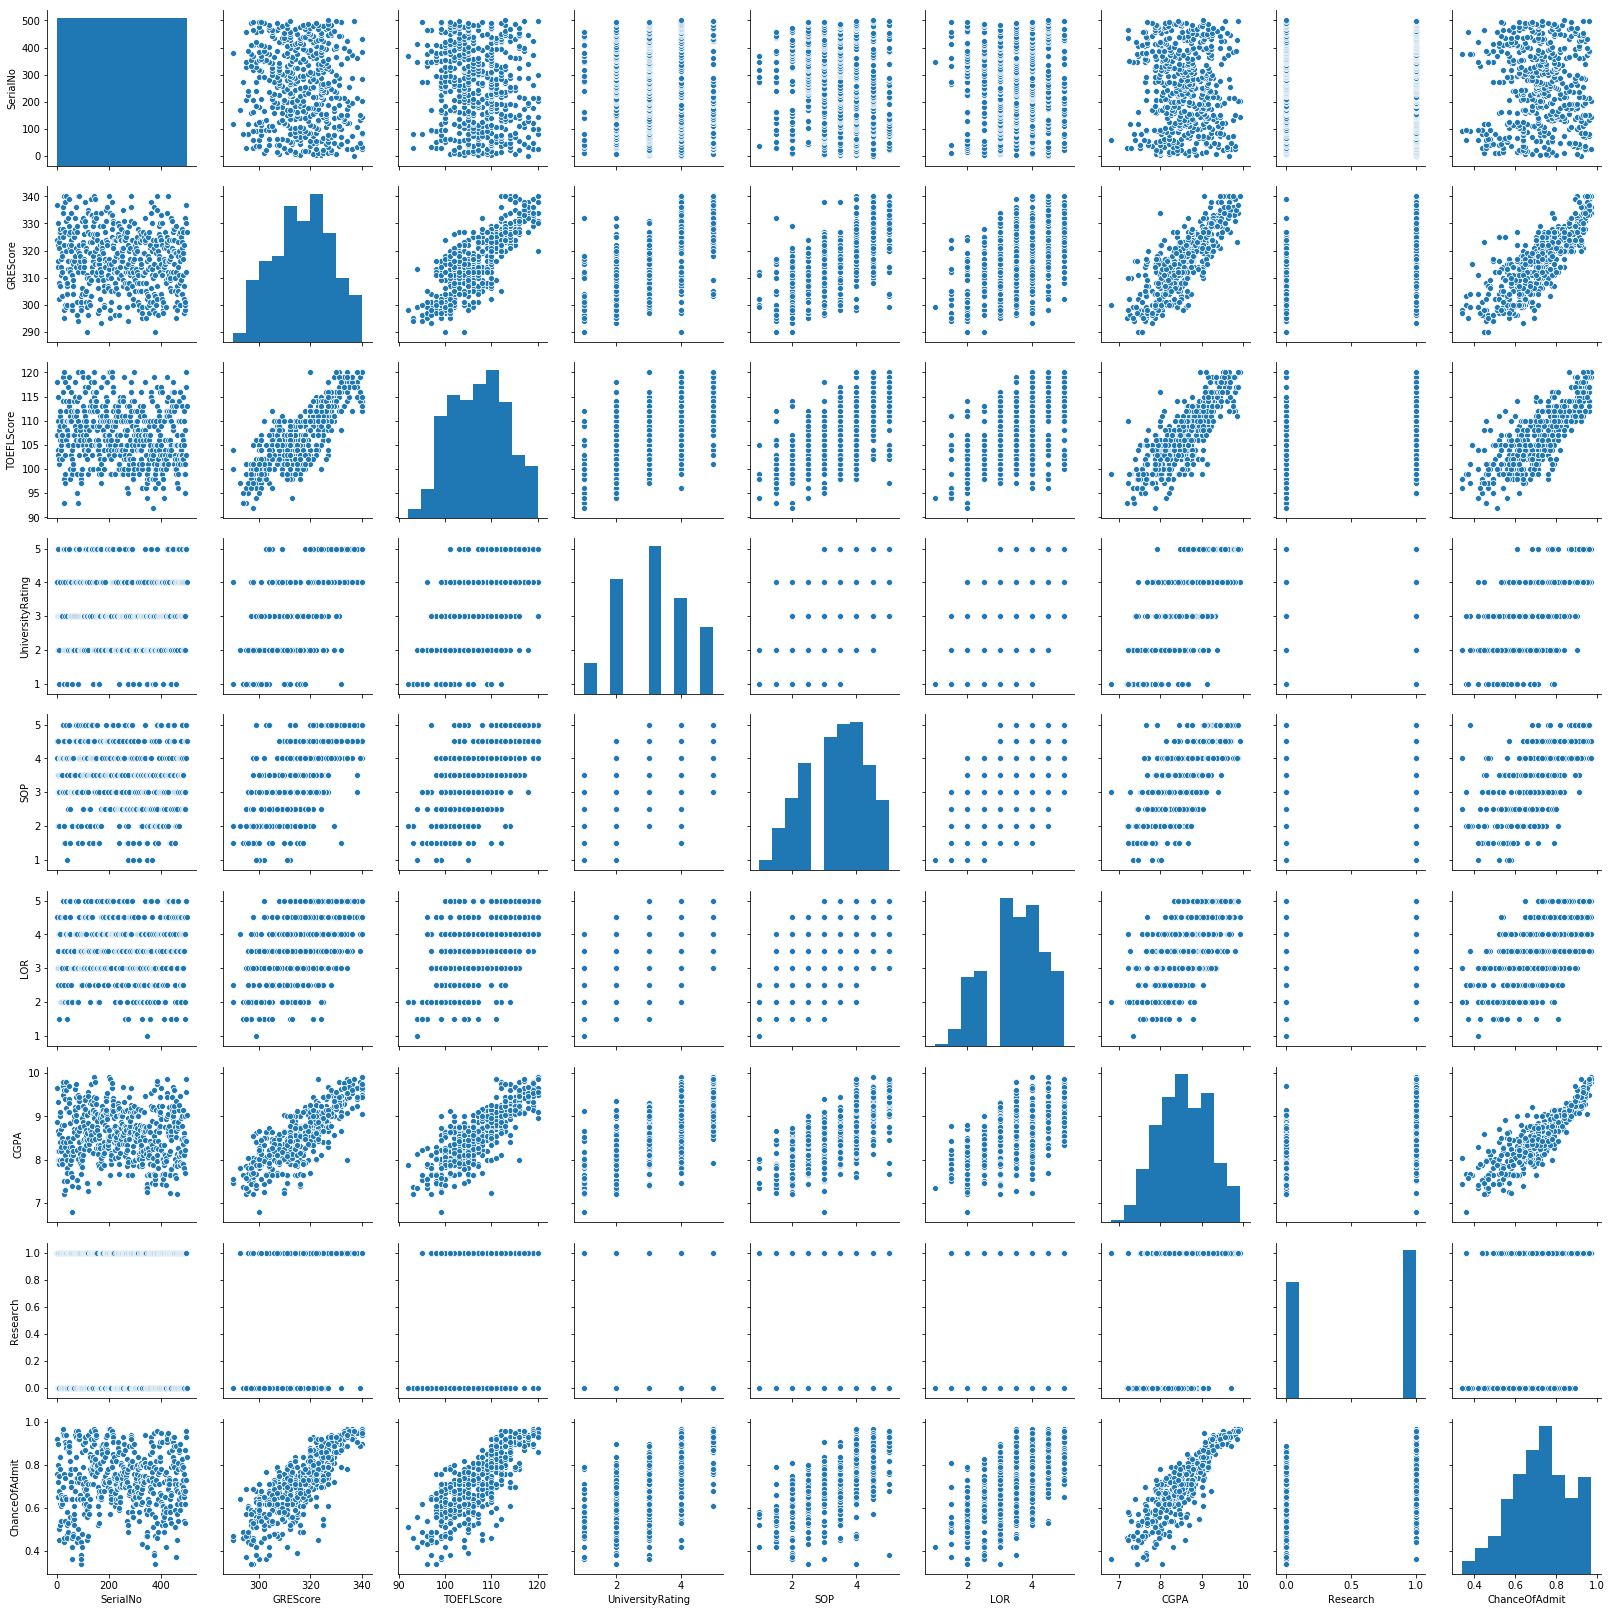

In [17]:
sns.pairplot(data_predict)
plt.show()

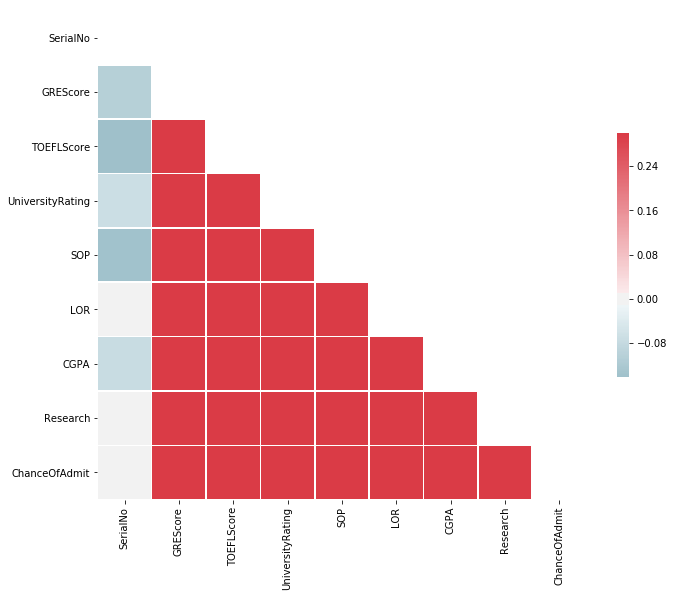

In [18]:
corr = data_predict.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

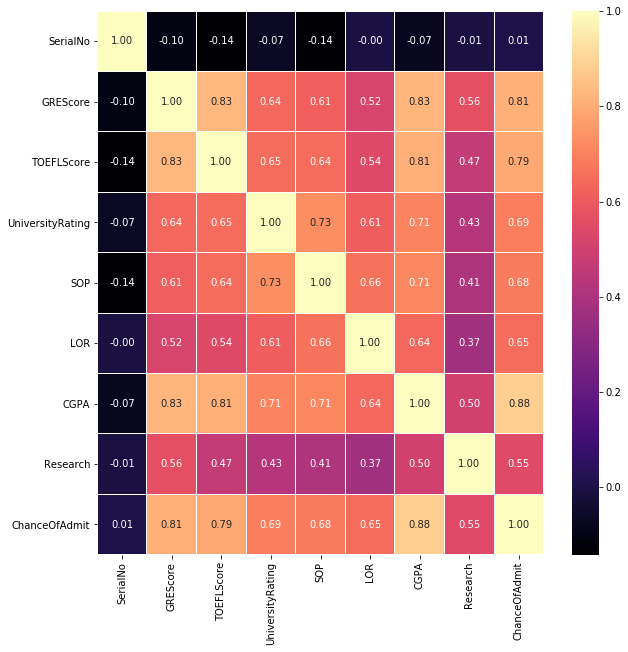

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_predict.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

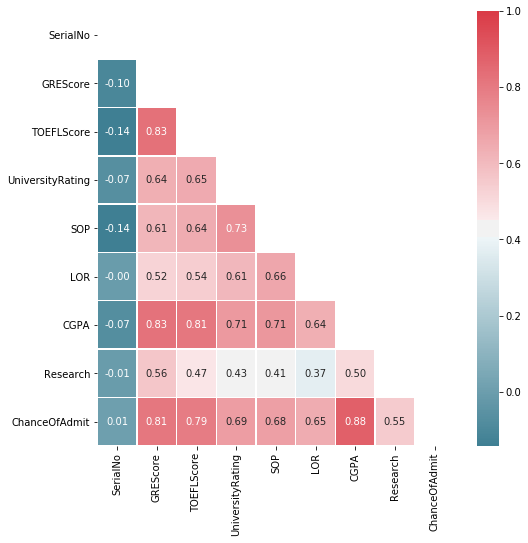

In [20]:
import numpy as np
corr = data_predict.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

<p>In the heat map above, we need to delete the serial no value because it does not give any value.</p>

In [21]:
data_predict=data_predict.drop(['SerialNo'],axis=1) #1 column 0 row

In [22]:
data_predict.corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceOfAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [23]:
data_predict.iloc[:,:6].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000


<p id='4'><h3>Research Analysis</h3></p>

In [24]:
#show data columns
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

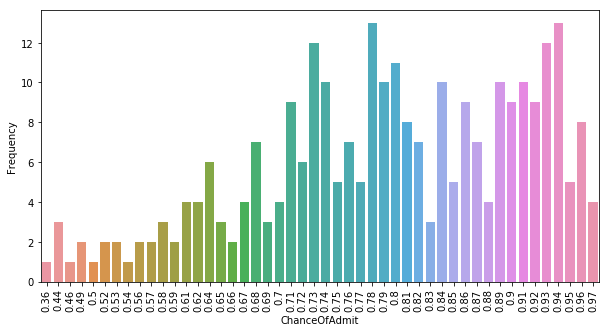

In [25]:
#Research group 1, ChanceOfAdmit value of all TOEFLScore data by grouping the number of data is performed.
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

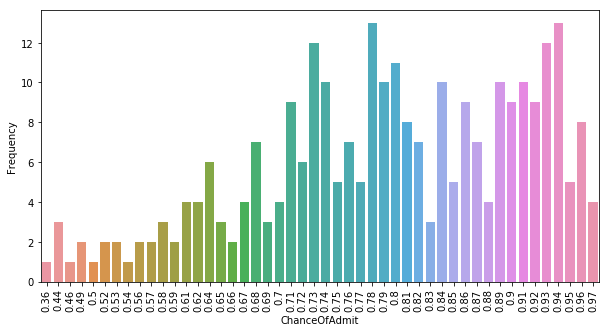

In [26]:
#Research group 1, ChanceOfAdmit value of all TOEFLScore data by grouping the number of data is performed.
plt.figure(figsize=(10,5))
research_predict=data_predict[data_predict['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
research_predict=research_predict.sort_values(ascending=True)
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [27]:
data_predict.head(1)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [28]:
max(data_predict['UniversityRating'])

5

In [29]:
filter_data=data_predict[np.logical_and(data_predict['ChanceOfAdmit']==1.0,data_predict['UniversityRating']==max(data_predict['UniversityRating']))]

In [30]:
filter_data.groupby('UniversityRating')[['GREScore','TOEFLScore','CGPA']].mean()

,GREScore,TOEFLScore,CGPA
UniversityRating,,,


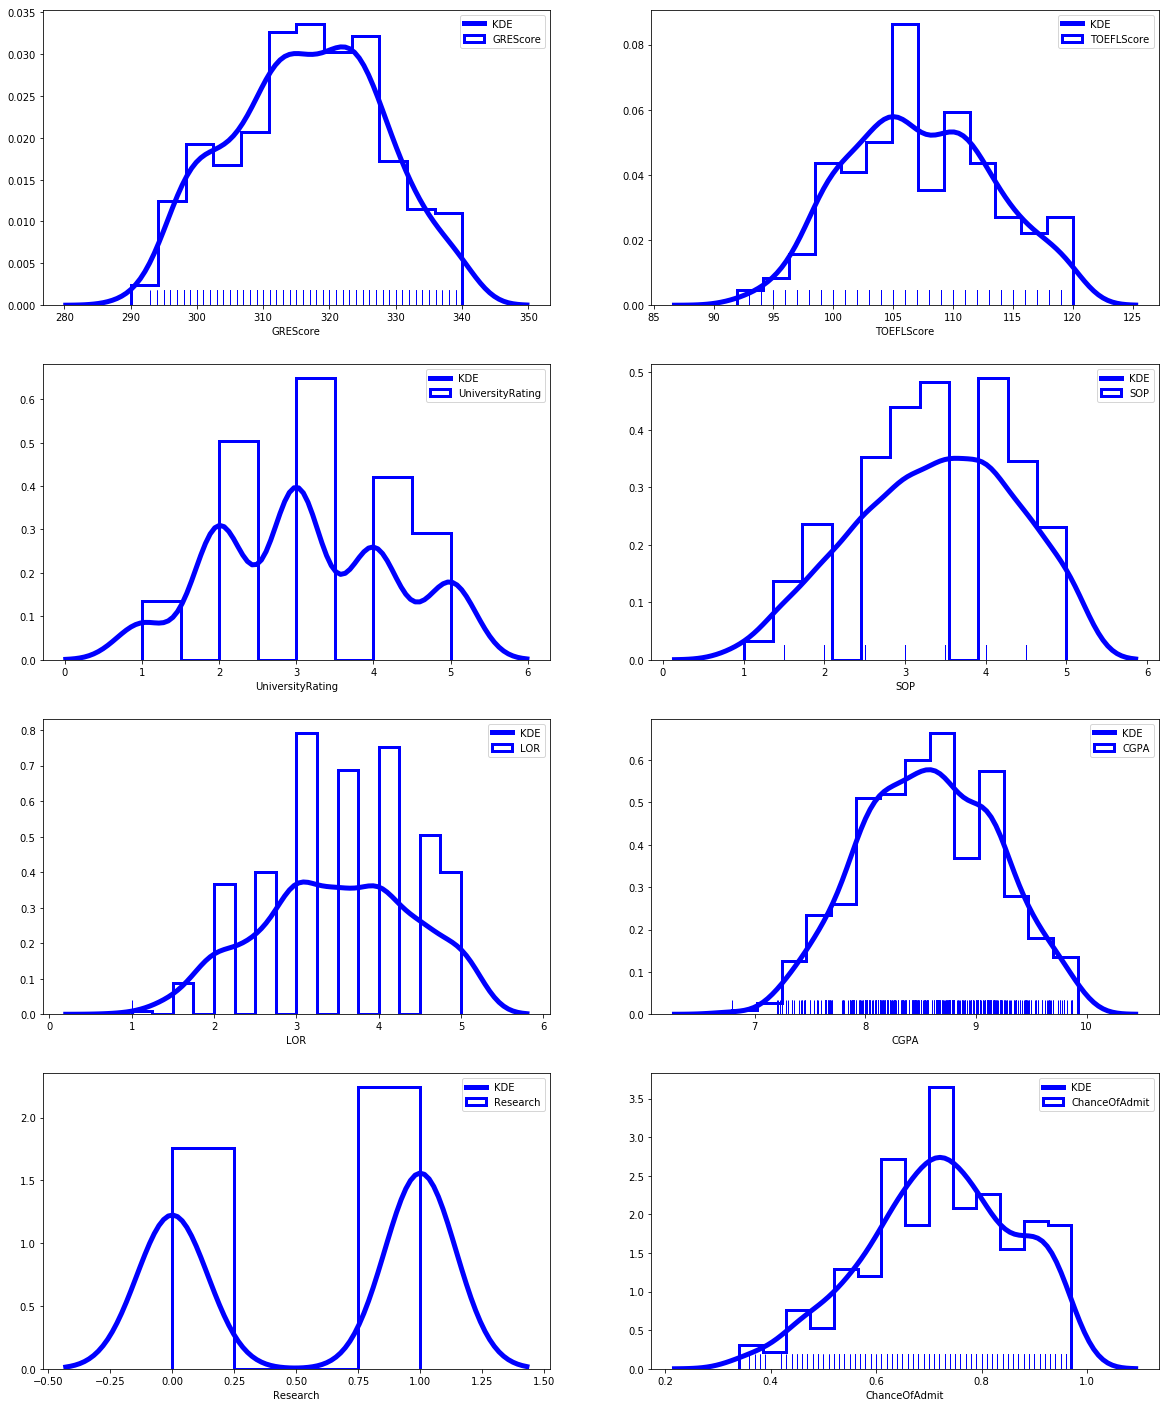

In [31]:
plt.figure(figsize=(20,25))
i = 0

for item in data_predict.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.distplot(data_predict[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "blue", "lw": 5, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
#     sns.distplot(admission_v1[item], kde=True,label="{0}".format(item))
plt.show()

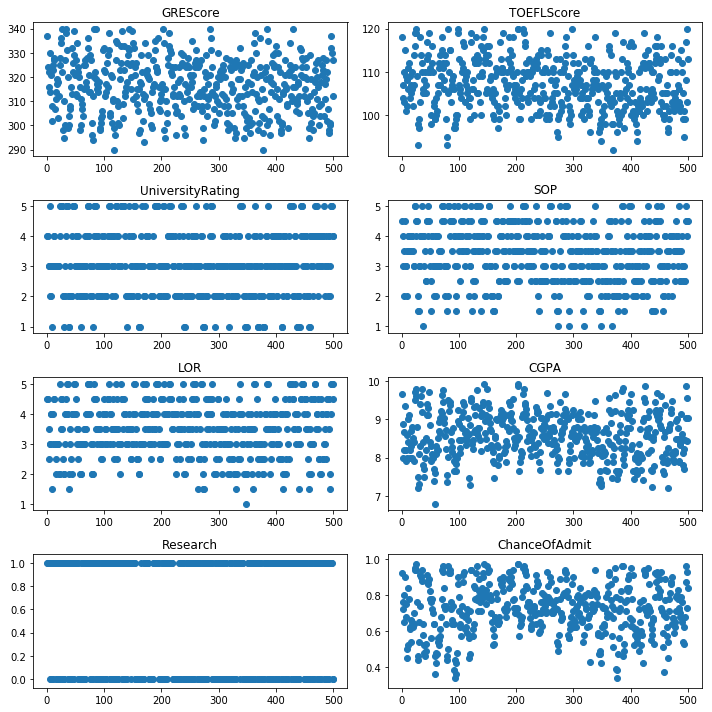

In [32]:
for i,col in enumerate(data_predict.columns):
    plt.subplot(4,2,i+1)
    plt.scatter(np.arange(1,501),data_predict[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

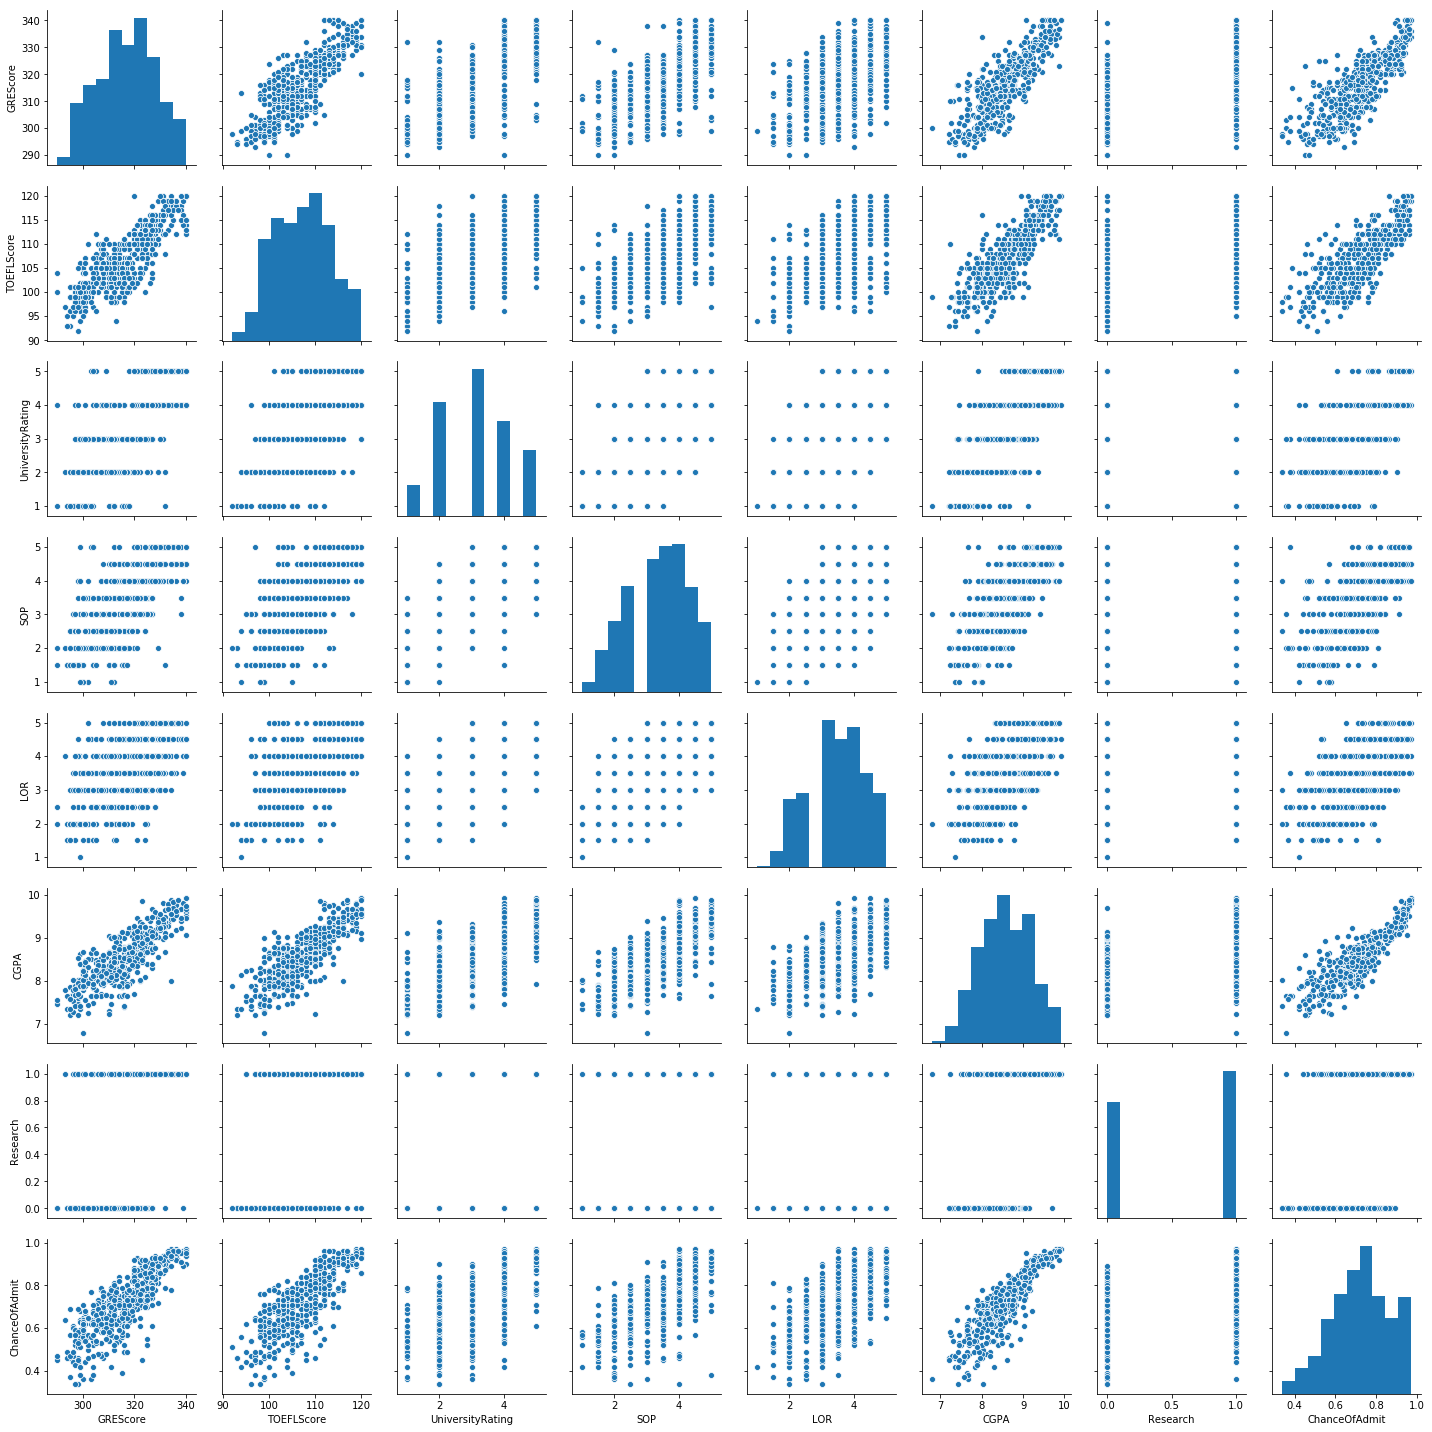

In [33]:
# Basic correlogram
sns.pairplot(data_predict)
plt.show()

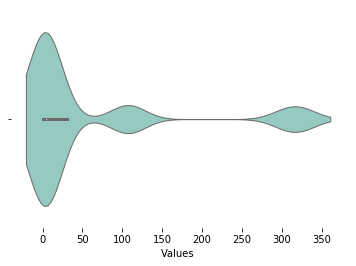

In [34]:
sns.violinplot(data_predict, palette="Set3", bw=.2, cut=1, linewidth=1)

ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
plt.xlabel("Values")
plt.show()

In [35]:
data_predict.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


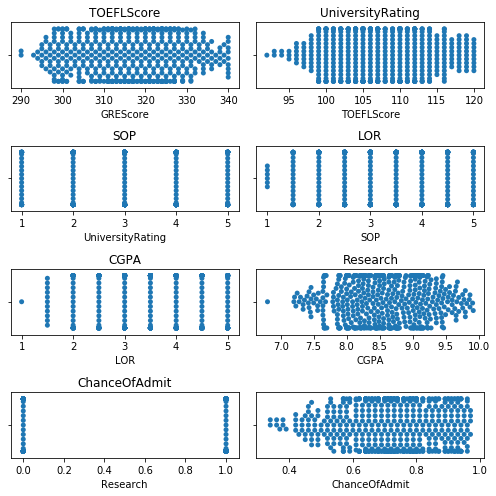

In [36]:
plt.figure(figsize=(7,7))
for i,col in enumerate(data_predict.columns):
    plt.title(col)
    plt.subplot(4,2,i+1)
    sns.swarmplot(data_predict[col])
    ax,fig=plt.gcf(),plt.gca()
    plt.tight_layout()
plt.show()

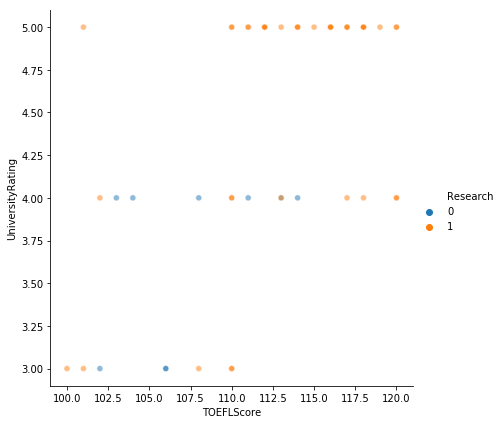

In [37]:
data_lor=data_predict[data_predict['LOR']>4.5]
sns.relplot(x="TOEFLScore", y="UniversityRating", hue="Research",
            sizes=(40, 400), alpha=.5,
            height=6, data=data_lor)

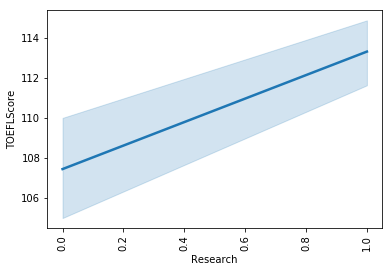

In [38]:
# Show each distribution with both violins and points
sns.lineplot(data_lor.Research,data_lor.TOEFLScore,linewidth=2.5)
plt.xticks(rotation=90)
plt.show()

In [39]:
data_predict.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


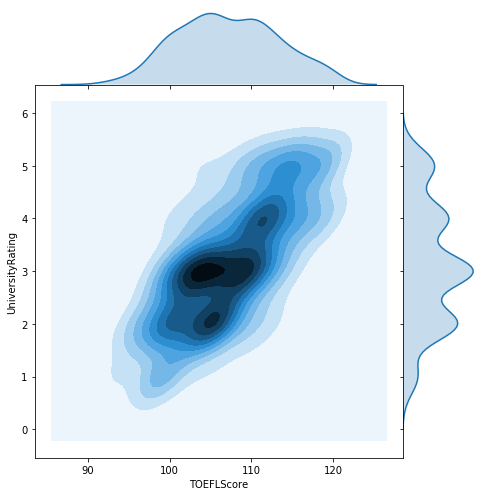

In [40]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(data_predict.TOEFLScore, data_predict.UniversityRating, kind="kde", height=7, space=0)
plt.show()

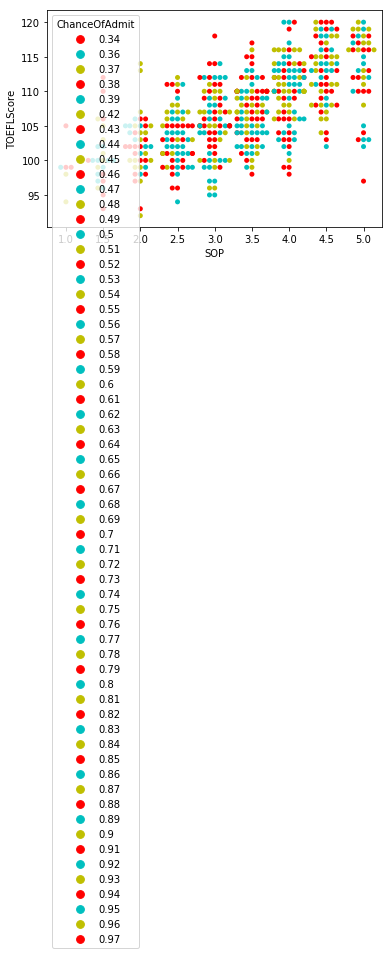

In [41]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(y="TOEFLScore", x="SOP", hue="ChanceOfAdmit",
              palette=["r", "c", "y"], data=data_predict)
plt.show()

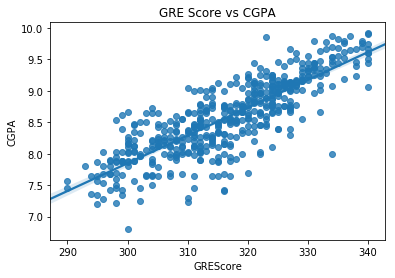

In [42]:
fig = sns.regplot(x="GREScore", y="CGPA", data=data_predict)
plt.title("GRE Score vs CGPA")
plt.show()

In [43]:
#data show first five rows
data_predict.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


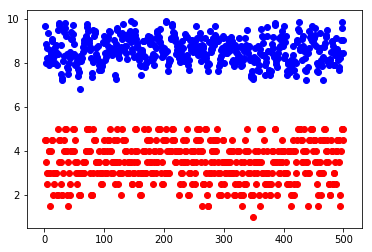

In [44]:
#We analyze the status of the CGPA and LOR data.
plt.scatter(x=np.arange(1,501),y=data_predict['CGPA'],color='b')
plt.scatter(x=np.arange(1,501),y=data_predict['LOR'],color='r')
plt.show()

In [45]:
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

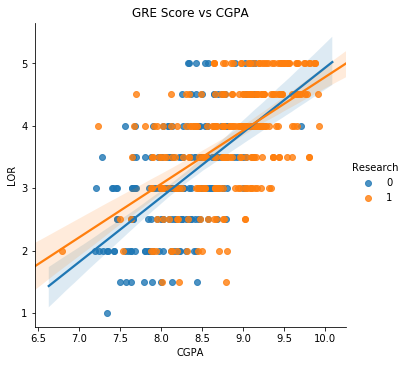

In [46]:
#Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working
fig = sns.lmplot(x="CGPA", y="LOR", data=data_predict, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

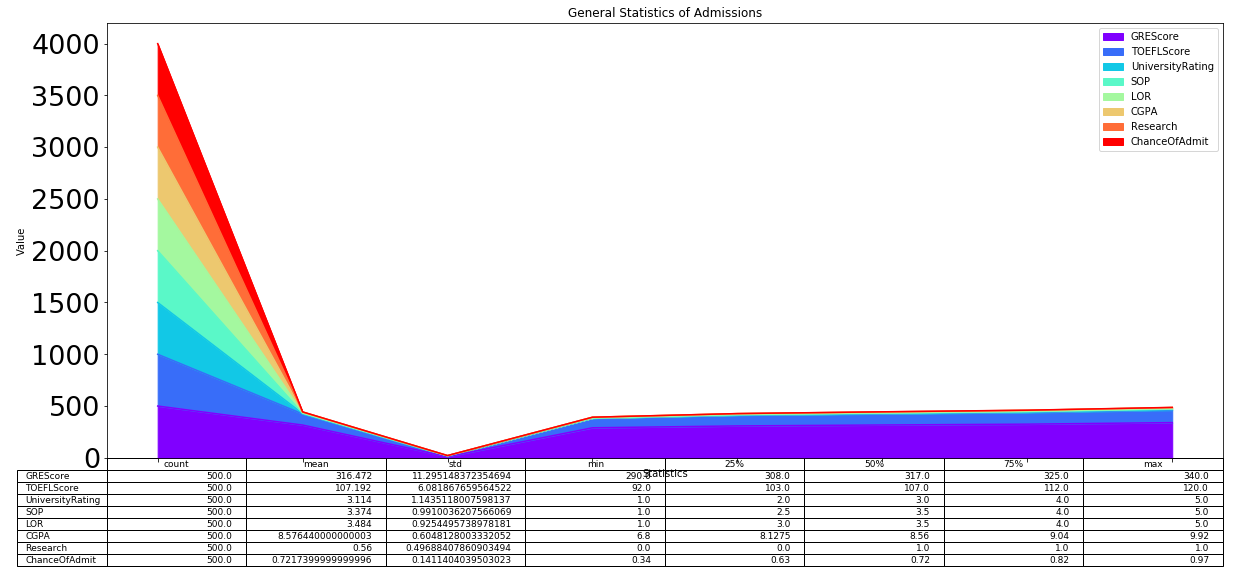

In [47]:
data_predict.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.show()

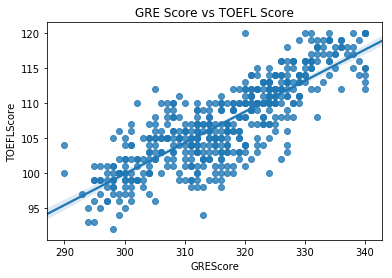

In [48]:
fig = sns.regplot(x=data_predict["GREScore"], y=data_predict["TOEFLScore"])
plt.title("GRE Score vs TOEFL Score")
plt.show()

In [49]:
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

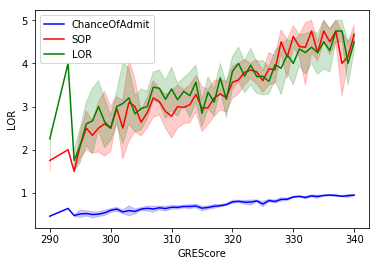

In [50]:
sns.lineplot(x="GREScore", y="ChanceOfAdmit",
             data=data_predict,color='b',label='ChanceOfAdmit')
sns.lineplot(x="GREScore", y="SOP",
             data=data_predict,color='r',label='SOP')
sns.lineplot(x="GREScore", y="LOR",
             data=data_predict,color='G',label='LOR')
plt.legend(loc=2)
plt.show()

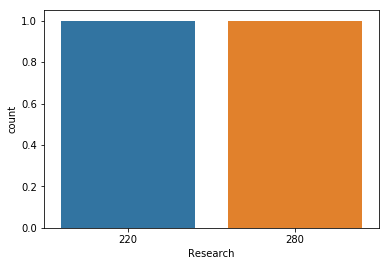

In [51]:
sns.countplot(data_predict.Research.value_counts())
plt.show()

<p>As you can see above, we see that the value of the research property is not evenly distributed.</p>
<p>In addition, when we look at the correlation values, it is seen that the value of Research feature is not too significant.</p>

In [52]:
data_predict[data_predict['ChanceOfAdmit']>0.85].groupby('Research')['UniversityRating'].median()

Research
0    4
1    5
Name: UniversityRating, dtype: int64

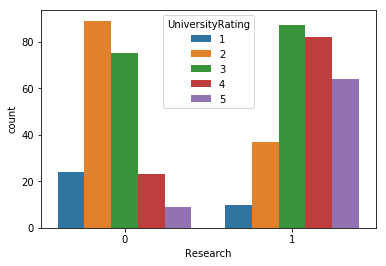

In [53]:
sns.countplot(x='Research', hue='UniversityRating', data=data_predict)
plt.show()

In [54]:
data_predict.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


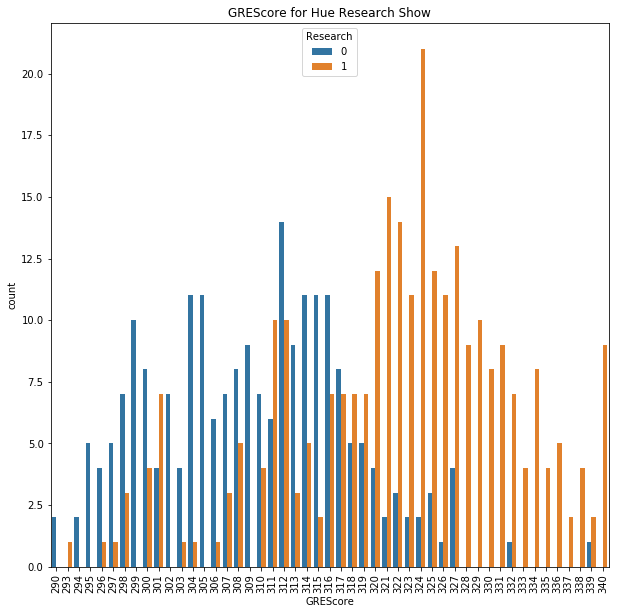

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(data_predict.GREScore,hue=data_predict.Research)
plt.title('GREScore for Hue Research Show')
plt.xticks(rotation=90)
plt.show()

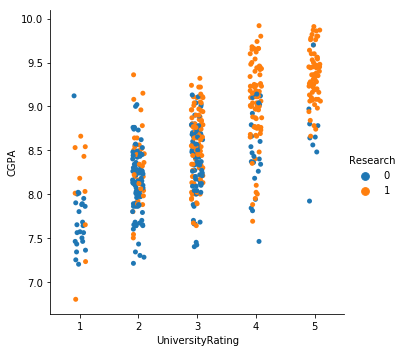

In [56]:
sns.catplot(y="CGPA", x="UniversityRating", hue="Research", data=data_predict)
plt.show()

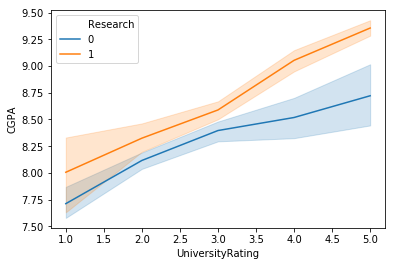

In [57]:
# Plot the responses for different events and regions
sns.lineplot(y="CGPA", x="UniversityRating",
             hue="Research",data=data_predict)
plt.show()

<p>The above mentioned graphs are visualized on the university rates and the research process that appears in the graphs.</p>

<p id='5'><h3>GRE Score Analysis</h3></p>

In [58]:
print("Max GREScore :",max(data_predict.GREScore))
print("Min GREScore :",min(data_predict.GREScore))

#We will now perform an analysis with GREScore. In this analysis, 
#we will give ourselves a certain range and we will proceed with these intervals.


Max GREScore : 340
Min GREScore : 290


In [59]:
maxvalues=data_predict[data_predict.GREScore>=320]
meanvalues=data_predict[(data_predict.GREScore>295)&(data_predict.GREScore<320)]
minvalues=data_predict[(data_predict.GREScore<=295)]

In [60]:
print(len(maxvalues))
print(len(meanvalues))
print(len(minvalues))

213
277
10


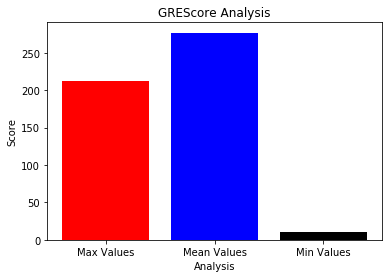

In [61]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
colorlists=['red','blue','black']
plt.bar(x,y,color=colorlists)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

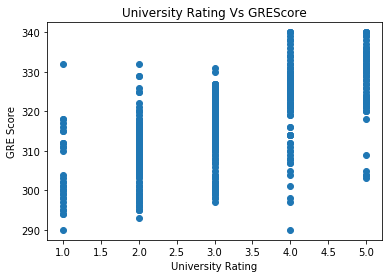

In [62]:
plt.scatter(x='UniversityRating',y='GREScore',data=data_predict)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()

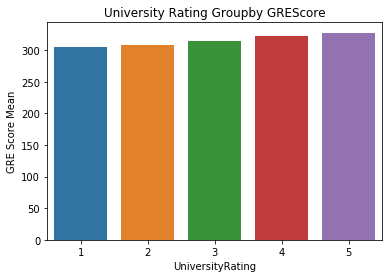

In [63]:
data_predict.groupby('UniversityRating')['GREScore'].mean()
sns.barplot(x=data_predict.groupby('UniversityRating')['GREScore'].mean().index,y=data_predict.groupby('UniversityRating')['GREScore'].mean().values)
plt.ylabel('GRE Score Mean')
plt.title('University Rating Groupby GREScore')
plt.show()

<p id='6'><h3>TOEFL Score Analysis</h3></p>

In [64]:
print("Min TOEFLScore :",min(data_predict.TOEFLScore))
print("Max TOEFLScore :",max(data_predict.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


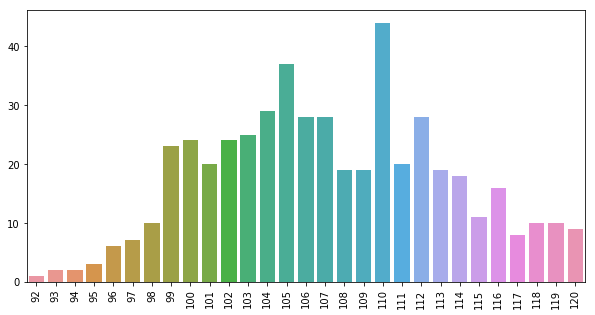

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_predict.TOEFLScore.value_counts().index,y=data_predict.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.show()

<p>A visible rating is available for the TOEFL Score feature. The 110 Score value is the most received value. and 92 Score value is the lowest received value. Later on, we will continue our understandings.</p>

<p id='7'><h3>University Rating Analysis</h3></p>

In [66]:
data_predict.UniversityRating.value_counts()

3    162
2    126
4    105
5     73
1     34
Name: UniversityRating, dtype: int64

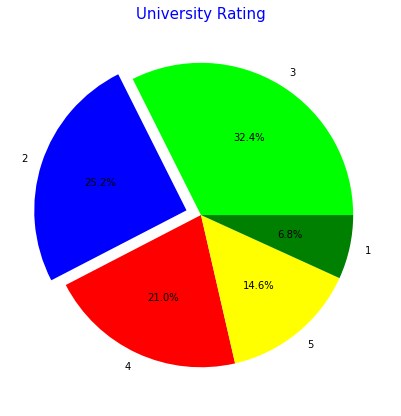

In [67]:
#The analysis of the university rating values was made. 
#A maximum of 3.0 is shown in the extracted results. All of these analysis results are given in pie.
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize=(7,7))
plt.pie(data_predict.UniversityRating.value_counts().values,explode=explode,labels=data_predict.UniversityRating.value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('University Rating',color='blue',fontsize=15)
plt.show()

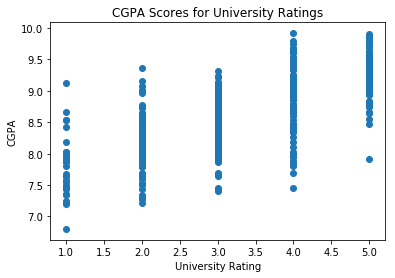

In [68]:
#Multiple analysis and representation in graphics
plt.scatter(data_predict.UniversityRating,data_predict.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

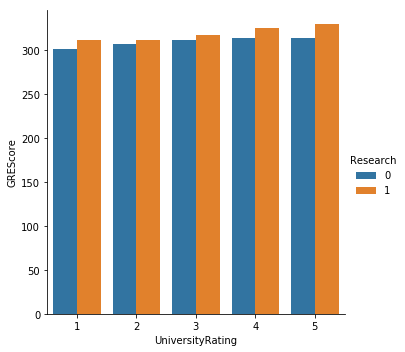

In [69]:
tt = data_predict.groupby(['UniversityRating','Research']).mean().reset_index()
sns.factorplot(x='UniversityRating', y='GREScore', hue='Research', data=tt, kind='bar')
plt.show()

In [70]:
data_predict.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
UniversityRating,,,
1,1.941176,2.426471,7.798529
2,2.682540,2.956349,8.177778
3,3.308642,3.401235,8.500123
4,4.000000,3.947619,8.936667
5,4.479452,4.404110,9.278082


<p>We used scatter function in this section. Because each student has a certain CGPA value. We tried this way to show them better. In addition, we can see that the people who are very hardworking are better than CGPA values.</p>

<p id='8'><h3>CGPA vs GRE Score Analysis</h3></p>

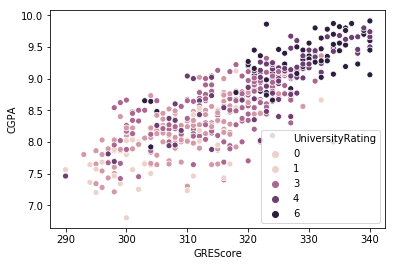

In [71]:
sns.scatterplot(y="CGPA", x="GREScore",
                hue="UniversityRating",
                data=data_predict)
plt.show()

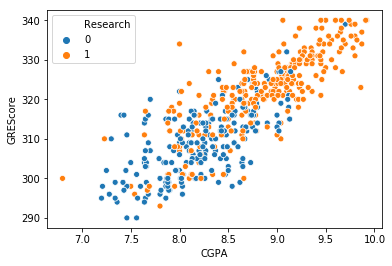

In [72]:
sns.scatterplot(x="CGPA", y="GREScore",
                hue="Research",
                data=data_predict)
plt.show()

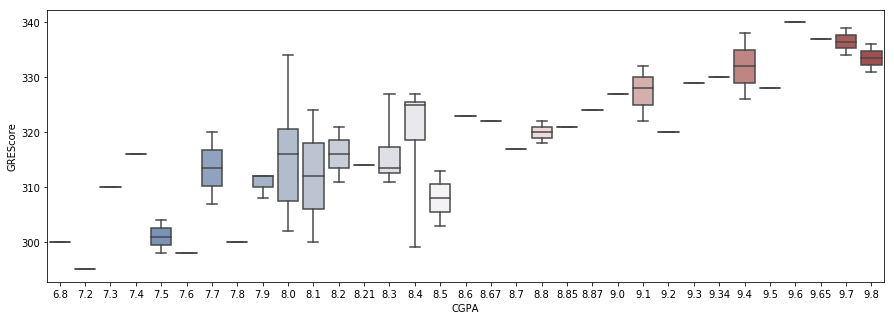

In [73]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CGPA", y="GREScore", data=data_predict[:60],whis="range", palette="vlag")
plt.show()

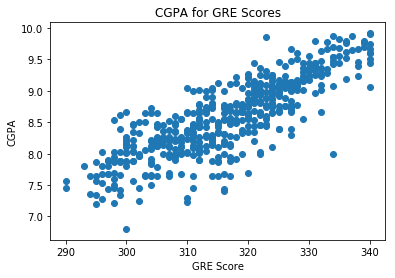

In [74]:
#This section shows the status of all students between the GREScore value and CGPA values. 
#In addition, there are some values, which appear to be a bit more lazy among themselves. 
#Thus, the CGPA value is between 330 and 340 and it is seen that the GREScore value is very low. 
#This is for us as sling data or inconsistent data. Of course, we can use this situation instead of deleting this situation.
plt.scatter(data_predict.GREScore,data_predict.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

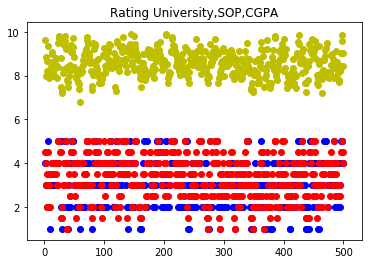

In [75]:
plt.scatter(x=np.arange(1,501),y=data_predict['UniversityRating'],color='b')
plt.scatter(x=np.arange(1,501),y=data_predict['SOP'],color='r')
plt.scatter(x=np.arange(1,501),y=data_predict['CGPA'],color='y')
plt.title('Rating University,SOP,CGPA')
plt.show()

In [76]:
print("Min CGPA Score :",min(data_predict.CGPA))
print("Max CGPA Score :",max(data_predict.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


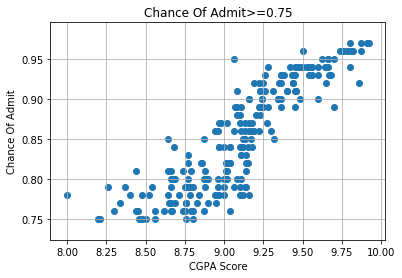

In [77]:
plt.scatter(x=data_predict[data_predict.ChanceOfAdmit >=0.75].CGPA,y=data_predict[data_predict.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.grid(True)
plt.show()

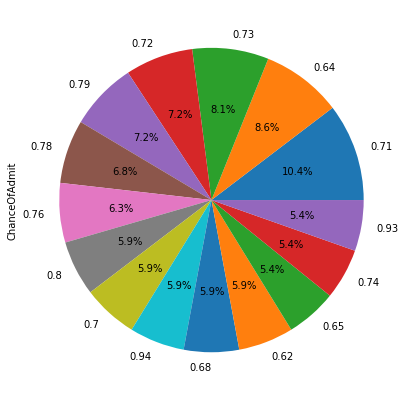

In [78]:
plt.figure(1, figsize=(7,7))
data_predict['ChanceOfAdmit'].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()

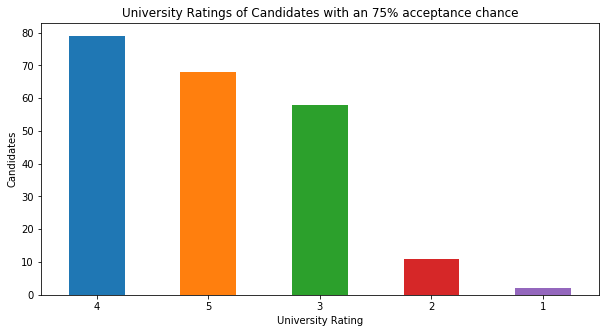

In [79]:
s = data_predict[data_predict["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
color_list=['red','blue','yellow','orange','black']
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

In [80]:
data_predict.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [81]:
data_predict[(data_predict.TOEFLScore>100) & (data_predict['Research']==0)].head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
4,314,103,2,2.0,3.0,8.21,0,0.65
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
15,314,105,3,3.5,2.5,8.30,0,0.54


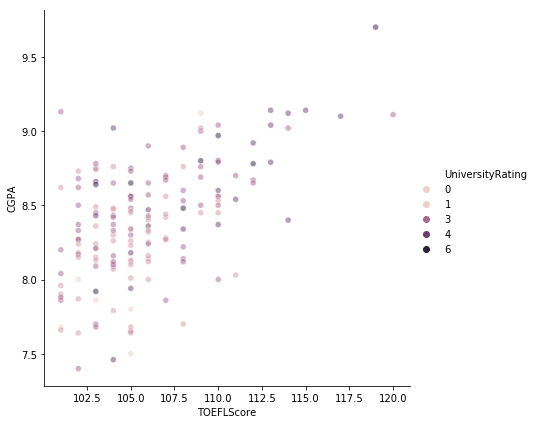

In [82]:
sns.relplot(x="TOEFLScore", y="CGPA", hue="UniversityRating",
            sizes=(40, 400), alpha=.5,
            height=6, data=data_predict[(data_predict.TOEFLScore>100) & (data_predict['Research']==0)])
plt.show()

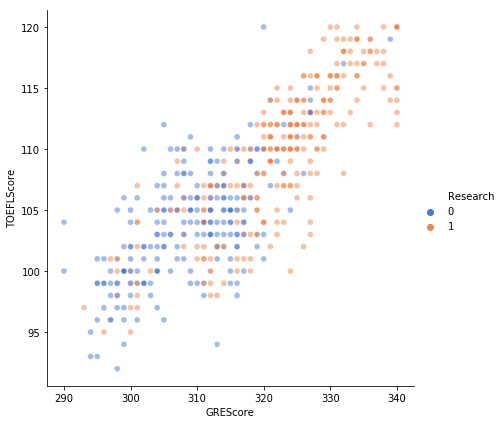

In [83]:
sns.relplot(x="GREScore", y="TOEFLScore", hue="Research",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_predict)
plt.show()

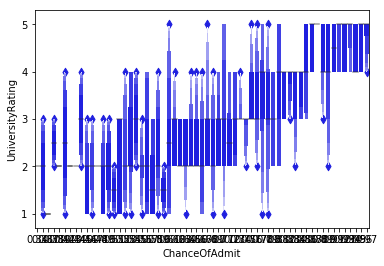

In [84]:
sns.boxenplot(x="ChanceOfAdmit", y="UniversityRating",
              color="b",scale="linear", data=data_predict)
plt.show()

In [85]:
index_ChaceOfAdmit=[]
for sop in data_predict.SOP.value_counts().index:
    index_ChaceOfAdmit.append(len(data_predict[(data_predict['SOP']==sop)&(data_predict['ChanceOfAdmit']>0.75)]))

<p>Our data is a situation that summarizes the numerical relationships between each other. This corr () function reveals the correlation values between the data. As can be seen, the first five relationships are almost 1.0000 between each other. This is good for now. But if we do this for all features, this is not good.</p>

In [86]:
data_predict.iloc[:,:-1].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


In [87]:
data_predict.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

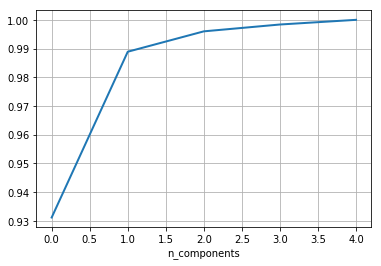

In [88]:
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=5
pca_data=pca.fit_transform(data_predict)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.show()

In [89]:
data_predict['ChanceOfAdmit']=[1 if chance>=0.75  else 0 for chance in data_predict['ChanceOfAdmit']]

In [90]:
data_predict=data_predict.astype(float)

<p>So, we need to analyze in-house for each feature value. In order for this analysis to be very robust, we need to index all values between values. There are many different methods for this. But we'il do it. Normalization or z-score. We're going to do a z-score here.</p>
<p>Some analysts perform the train_test_split process first.After ,we need to make scale values.This system that's true.</p>

<p>All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.</p>

<p id='9'><h1>MODEL, TRAINING and TESTING</h1></p>
<p>As a result of our initial evaluations, we have used a number of artificial learning algorithms. These are logistic regression, support vector machine (SVM), k close neighborhood (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms. The first algorithm is logistic regression algorithm. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.</p>

<p>First, we have 19 properties. By grouping these features we will see which one is the most successful.</p>

In [91]:
dataX=data_predict.drop('ChanceOfAdmit',axis=1)
dataY=data_predict['ChanceOfAdmit']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [93]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 7)
X_test (100, 7)
y_train (400,)
y_test (100,)


<p>The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.</p>

In [94]:
'''sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
'''
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test))

In [95]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [96]:
combine_features_list=[
    ('GREScore','TOEFLScore','UniversityRating'),
    ('SOP','LOR','CGPA','Research'),
    ('GREScore','SOP','TOEFLScore','CGPA'),
    ('UniversityRating','Research')
]

<p id='10'><h1>Logistic Regression</h1></p>
<p>First we need parameters to use our data more effectively. Hyperthermatic technique was used for this condition. This technique is used to express different features in the process.</p>

<p>Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross- entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.)

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty.</p>



In [97]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test1'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 
   

('GREScore', 'TOEFLScore', 'UniversityRating')
**************************************************
Best parameters set:
{'C': 0.5, 'penalty': 'l1', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       218
         1.0       0.88      0.84      0.86       182

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.87       400

**************************************************
Train Confusion Matrix:
[[197  21]
 [ 29 153]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        64
         1.0       0.78      0.86      0.82        36

    accuracy                     

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'C': 0.5, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 88</td>
<td>% 87</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'C': 0.4, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 89</td>
<td>% 90</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'C': 0.4, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 89</td>
<td>% 92</td>
</tr>

<tr>
<td>('UniversityRating', 'Research')</td>
<td>{'C': 0.4, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 80</td>
<td>% 83</td>
</tr>

</table>

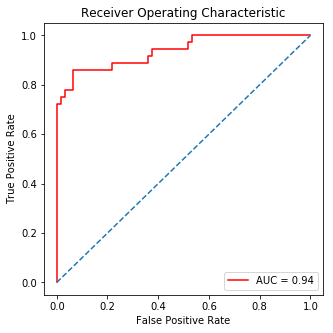

Accurancy Oranı : 0.82
Logistic TRAIN score with  0.8275
Logistic TEST score with  0.82

[[51 13]
 [ 5 31]]


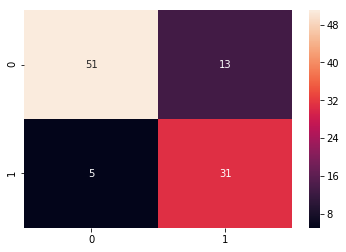

In [98]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<p id='11'><h1>K-Nearest Neighbors</h1></p>

In [99]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 12}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       218
         1.0       0.89      0.81      0.85       182

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.87      0.87      0.87       400

**************************************************
Train Confusion Matrix:
[[199  19]
 [ 34 148]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        64
         1.0       0.78      0.86      0.82     

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'n_jobs': 2, 'n_neighbors': 12}</td>
<td>% 87</td>
<td>% 87</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'n_jobs': 2, 'n_neighbors': 5}</td>
<td>% 89</td>
<td>% 87</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'n_jobs': 2, 'n_neighbors': 10}</td>
<td>% 88</td>
<td>% 90</td>
</tr>

<tr>
<td>('UniversityRating', 'Research')</td>
<td>{'n_jobs': 2, 'n_neighbors': 31}</td>
<td>% 80</td>
<td>% 82</td>
</tr>

</table>

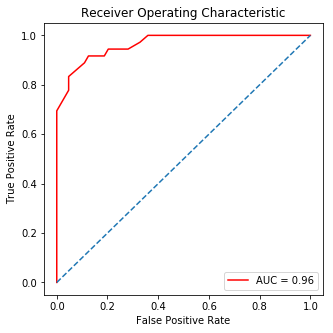

Accurancy Oranı : 0.89
KNN TRAIN score with  0.88
KNN TEST score with  0.89

[[56  8]
 [ 3 33]]


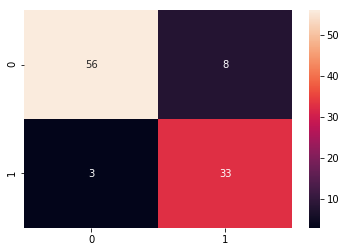

In [100]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

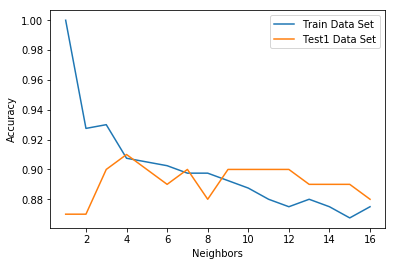

In [101]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [102]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8469696969696968, 0.8423520923520922, 0.8797979797979799, 0.8820346320346321, 0.8695526695526694, 0.8769841269841269, 0.8795093795093796, 0.8668831168831169, 0.8643578643578643, 0.8694083694083692, 0.861976911976912, 0.872077922077922, 0.8694083694083693, 0.867171717171717, 0.872077922077922, 0.8719336219336218]


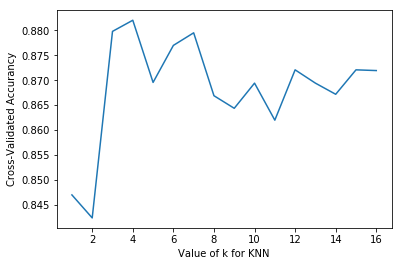

In [103]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

<p id='12'><h1>Naive Bayes</h1></p>

In [104]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 1, 'degree': 2, 'gamma': 0.3, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       218
         1.0       0.88      0.83      0.86       182

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

**************************************************
Train Confusion Matrix:
[[198  20]
 [ 31 151]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        64
         1.0       0.79      0.86      

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'C': 1, 'degree': 2, 'gamma': 0.3, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 87</td>
<td>% 87</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'C': 4, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 90</td>
<td>% 92</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'C': 3, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 89</td>
<td>% 91</td>
</tr>

<tr>
<td>('UniversityRating','Research')</td>
<td>{'C': 6, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 80</td>
<td>% 83</td>
</tr>

</table>

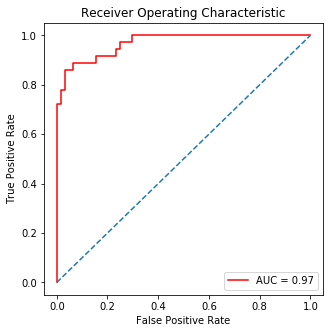

Accurancy Oranı : 0.87
SVC TRAIN score with  0.8875
SVC TEST score with  0.87

[[55  9]
 [ 4 32]]


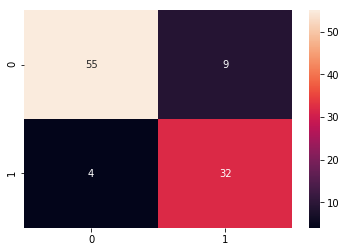

In [105]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<p id='13'><h1>Gradient Boosting Machine</h1>	</p>

In [106]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 14, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       218
         1.0       0.91      0.81      0.86       182

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.88       400
weighted avg       0.88      0.88      0.88       400

**************************************************
Train Confusion Matrix:
[[203  15]
 [ 34 148]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        64
         1.0       0.77      0.83      0.80        36

    accuracy  

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'learning_rate': 0.02, 'n_estimators': 14, 'random_state': 0}</td>
<td>% 88</td>
<td>% 85</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 11, 'random_state': 0}</td>
<td>% 89</td>
<td>% 91</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 10, 'random_state': 0}</td>
<td>% 91</td>
<td>% 92</td>
</tr>

<tr>
<td>('UniversityRating','Research')</td>
<td>{'learning_rate': 0.01, 'n_estimators': 15, 'random_state': 0}</td>
<td>% 81</td>
<td>% 89</td>
</tr>

</table>

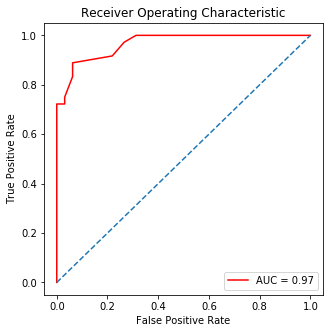

Accurancy Oranı : 0.92
GradientBoostingClassifier TRAIN score with  0.915
GradientBoostingClassifier TEST score with  0.92

[[60  4]
 [ 4 32]]


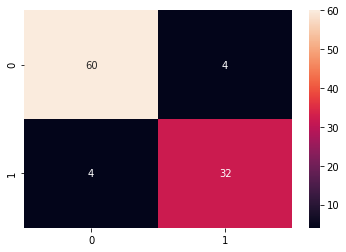

In [107]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

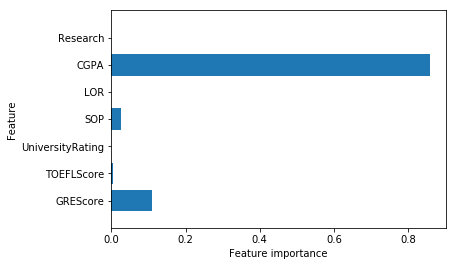

In [108]:
plot_feature_importances(gbc)
plt.show()

<p id='14'><h1>Random Forest</h1>	</p>

In [109]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       218
         1.0       0.91      0.80      0.85       182

    accuracy                           0.87       400
   macro avg       0.88      0.86      0.87       400
weighted avg       0.87      0.87      0.87       400

**************************************************
Train Confusion Matrix:
[[203  15]
 [ 37 145]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        64
         1.0       0.82      0.86      0.84        3

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}</td>
<td>% 87</td>
<td>% 88</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}</td>
<td>% 90</td>
<td>% 91</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 3}</td>
<td>% 89</td>
<td>% 92</td>
</tr>

<tr>
<td>('UniversityRating','Research')</td>
<td>{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 3}</td>
<td>% 81</td>
<td>% 82</td>
</tr>

</table>

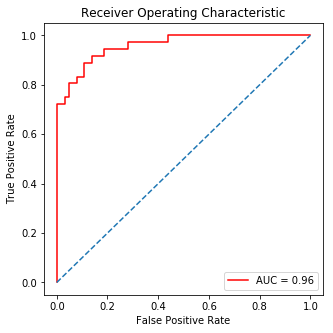

Accurancy Oranı : 0.87
RandomForestClassifier TRAIN score with  0.97
RandomForestClassifier TEST score with  0.87

[[57  7]
 [ 6 30]]


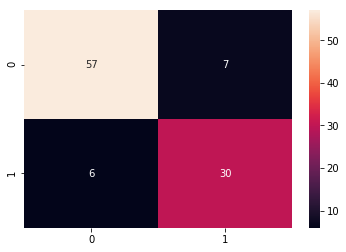

In [110]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [111]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.89
TEST set score w/ 2 estimators: 0.91
TEST set score w/ 3 estimators: 0.93
TEST set score w/ 4 estimators: 0.89
TEST set score w/ 5 estimators: 0.9
TEST set score w/ 6 estimators: 0.89
TEST set score w/ 7 estimators: 0.9
TEST set score w/ 8 estimators: 0.91
TEST set score w/ 9 estimators: 0.9
TEST set score w/ 10 estimators: 0.89


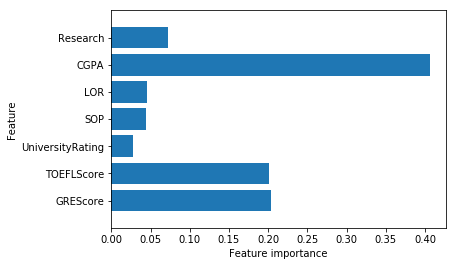

In [112]:
plot_feature_importances(rf)
plt.show()

<p id='15'><h1>Decision Tree</h1>	</p>

In [113]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       218
         1.0       0.98      0.92      0.95       182

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

**************************************************
Train Confusion Matrix:
[[214   4]
 [ 15 167]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        64
         1.0       0.73      0.89      0.80        36

    accuracy                           0.84       100
  

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'random_state': 42}</td>
<td>% 95</td>
<td>% 86</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'random_state': 42}</td>
<td>% 1.0</td>
<td>% 89</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'random_state': 42}</td>
<td>% 1.0</td>
<td>% 88</td>
</tr>

<tr>
<td>('UniversityRating','Research')</td>
<td>{'random_state': 42}</td>
<td>% 80</td>
<td>% 83</td>
</tr>

</table>

<p id='16'><h1>Kernelized SVM</h1></p>

In [114]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       218
         1.0       0.88      0.83      0.86       182

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

**************************************************
Train Confusion Matrix:
[[198  20]
 [ 31 151]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        64
         1.0       0.79      0.86      0.83        36

    accuracy                           0.87       100
  

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>'GREScore', 'TOEFLScore', 'UniversityRating'</td>
<td>{'random_state': 42}</td>
<td>% 87</td>
<td>% 87</td>
</tr>

<tr>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'random_state': 42}</td>
<td>% 86</td>
<td>% 90</td>
</tr>

<tr>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'random_state': 42}</td>
<td>% 87</td>
<td>% 91</td>
</tr>

<tr>
<td>('UniversityRating','Research')</td>
<td>{'random_state': 42}</td>
<td>% 80</td>
<td>% 82</td>
</tr>

</table>

<p id='17'><h1>CONCLUSION</h1></p>

<table border=2>
<tr>
<th>Algorithm</th>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>Logistic Regression</td>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'C': 0.4, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 89</td>
<td>% 92</td>
</tr>

<tr>
<td>KNN</td>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'n_jobs': 2, 'n_neighbors': 10}</td>
<td>% 88</td>
<td>% 90</td>
</tr>

<tr>
<td>Gradient Boosting Classifier</td>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 10, 'random_state': 0}</td>
<td>% 91</td>
<td>% 92</td>
</tr>

<tr>
<td>Random Forest</td>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}</td>
<td>% 90</td>
<td>% 91</td>
</tr>

<tr>
<td>Random Forest</td>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 3}</td>
<td>% 89</td>
<td>% 92</td>
</tr>

<tr>
<td>Decision tree</td>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'random_state': 42}</td>
<td>% 1.0</td>
<td>% 88</td>
</tr>

<tr>
<td>Decision tree</td>
<td>('UniversityRating','Research')</td>
<td>{'random_state': 42}</td>
<td>% 80</td>
<td>% 83</td>
</tr>

<tr>
<td>SVM</td>
<td>('SOP', 'LOR', 'CGPA', 'Research')</td>
<td>{'random_state': 42}</td>
<td>% 86</td>
<td>% 90</td>
</tr>

<tr>
<td>SVM</td>
<td>('GREScore', 'SOP', 'TOEFLScore', 'CGPA')</td>
<td>{'random_state': 42}</td>
<td>% 87</td>
<td>% 91</td>
</tr>

</table>

<p id='18'><h1>REFERENCES</h1></p>

<p>Link : https://www.kaggle.com/mohansacharya/graduate-admissions</p>
<h3>Context<h3>
<p>This dataset is created for prediction of Graduate Admissions from an Indian perspective.

<h3>Content</h3>
<p>The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )</p>

<h3>Acknowledgements</h3>
<p>This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.</p>

<h3>Inspiration</h3>
<p>This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.</p>

<h3>Citation</h3>
<p>Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019</p>